# Week 2

In [75]:
import urllib.request
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [4]:
url1 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
url2 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv'
url3 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv'
url4 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'

### Part 1

In [17]:
data1 = pd.read_csv(url1, delimiter='\t', header=None, names=['x', 'y'])
data2 = pd.read_csv(url2, delimiter='\t', header=None, names=['x', 'y'])
data3 = pd.read_csv(url3, delimiter='\t', header=None, names=['x', 'y'])
data4 = pd.read_csv(url4, delimiter='\t', header=None, names=['x', 'y'])

In [55]:
data = [data1.sort_values(by=['x']), data2.sort_values(by=['x']), data3.sort_values(by=['x']), data4.sort_values(by=['x'])]
fittedlines = []
for i in range(0, 4):
    meanx = np.mean(data[i]['x'])
    meany = np.mean(data[i]['y'])
    print("{:d}. dataset means: x={:.2f}, y={:.2f}".format(i+1, meanx, meany))
    varx = np.var(data[i]['x'])
    vary = np.var(data[i]['y'])
    print("{:d}. dataset variances: x={:.3f}, y={:.3f}".format(i+1, varx, vary))
    pearson = np.corrcoef(data[i], rowvar=False)
    np.set_printoptions(precision=3)
    print("Pearson correlation coefficient:")
    print(pearson)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[i]['x'],data[i]['y'])
    print("f(x) = {:.2f}x + {:.2f}".format(slope, intercept))
    fittedlines.append((slope, intercept))
    print('\n')

1. dataset means: x=9.00, y=7.50
1. dataset variances: x=10.000, y=3.752
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


2. dataset means: x=9.00, y=7.50
2. dataset variances: x=10.000, y=3.752
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


3. dataset means: x=9.00, y=7.50
3. dataset variances: x=10.000, y=3.748
Pearson correlation coefficient:
[[1.    0.816]
 [0.816 1.   ]]
f(x) = 0.50x + 3.00


4. dataset means: x=9.00, y=7.50
4. dataset variances: x=10.000, y=3.748
Pearson correlation coefficient:
[[1.    0.817]
 [0.817 1.   ]]
f(x) = 0.50x + 3.00




From the calculated values, the datasets are extremely similar, with only a slight difference in variance. 

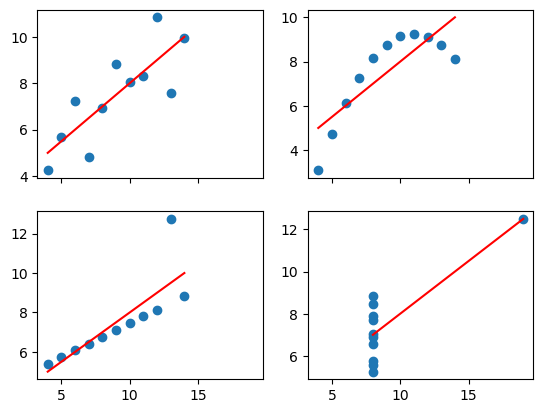

In [57]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True)
i = 0
for row in axes:
    for col in row:
        x = data[i]['x']
        col.scatter(x, data[i]['y'])
        y = fittedlines[i][0]*x + fittedlines[i][1]
        col.plot(x, y, color='red')
        i += 1
plt.show()

### Part 2

In [59]:
columns = ['Category', 'Date', 'Time', 'DayOfWeek']
data = pd.read_csv('crime.csv')
crimeData = pd.DataFrame(data, columns=columns)
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [78]:
crimeData['Date'] = pd.to_datetime(crimeData['Date'])
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayType = CategoricalDtype(categories=weekdays, ordered=True)
crimeData['DayOfWeek'] = crimeData['DayOfWeek'].astype(dayType)
crimeData = crimeData[crimeData['Date'].dt.year != 2018]
crimeData

,Category,Date,Time,DayOfWeek
0,ROBBERY,2004-11-22,17:50,Monday
1,VEHICLE THEFT,2005-10-18,20:00,Tuesday
2,VEHICLE THEFT,2004-02-15,02:00,Sunday
3,ARSON,2011-02-18,05:27,Friday
4,ASSAULT,2010-11-21,17:00,Sunday
...,...,...,...,...
2129520,DRUG/NARCOTIC,2017-06-22,01:42,Thursday
2129521,ASSAULT,2017-09-01,17:00,Friday
2129522,OTHER OFFENSES,2017-06-30,17:50,Friday
2129523,OTHER OFFENSES,2017-12-20,15:41,Wednesday


In [79]:
categorizedDaily = {}
days = pd.unique(crimeData['DayOfWeek'])
for category in focuscrimes:
    dict = {}
    for day in days:
        # filtering data to count the crimes in the specific category per day
        temp = data.loc[data['DayOfWeek'] == day]
        count = temp.loc[data['Category'] == category].shape[0]
        dict[day] = count
    # creating dataframe and adding it to dictionary labeled with the crime category
    df = pd.DataFrame(dict.items(), columns=['Day of the Week', 'Crime count'])
    categorizedDaily[category] = df
categorizedDaily

{'DISORDERLY CONDUCT':   Day of the Week  Crime count
 0          Monday         1468
 1         Tuesday         1561
 2          Sunday         1282
 3          Friday         1217
 4        Thursday         1434
 5        Saturday         1380
 6       Wednesday         1590,
 'DRUG/NARCOTIC':   Day of the Week  Crime count
 0          Monday        16640
 1         Tuesday        18765
 2          Sunday        13398
 3          Friday        16243
 4        Thursday        18272
 5        Saturday        14135
 6       Wednesday        20368,
 'WEAPON LAWS':   Day of the Week  Crime count
 0          Monday         2935
 1         Tuesday         2922
 2          Sunday         2846
 3          Friday         3160
 4        Thursday         2964
 5        Saturday         3059
 6       Wednesday         3118,
 'TRESPASS':   Day of the Week  Crime count
 0          Monday         2806
 1         Tuesday         2980
 2          Sunday         2385
 3          Friday         2754
 4 

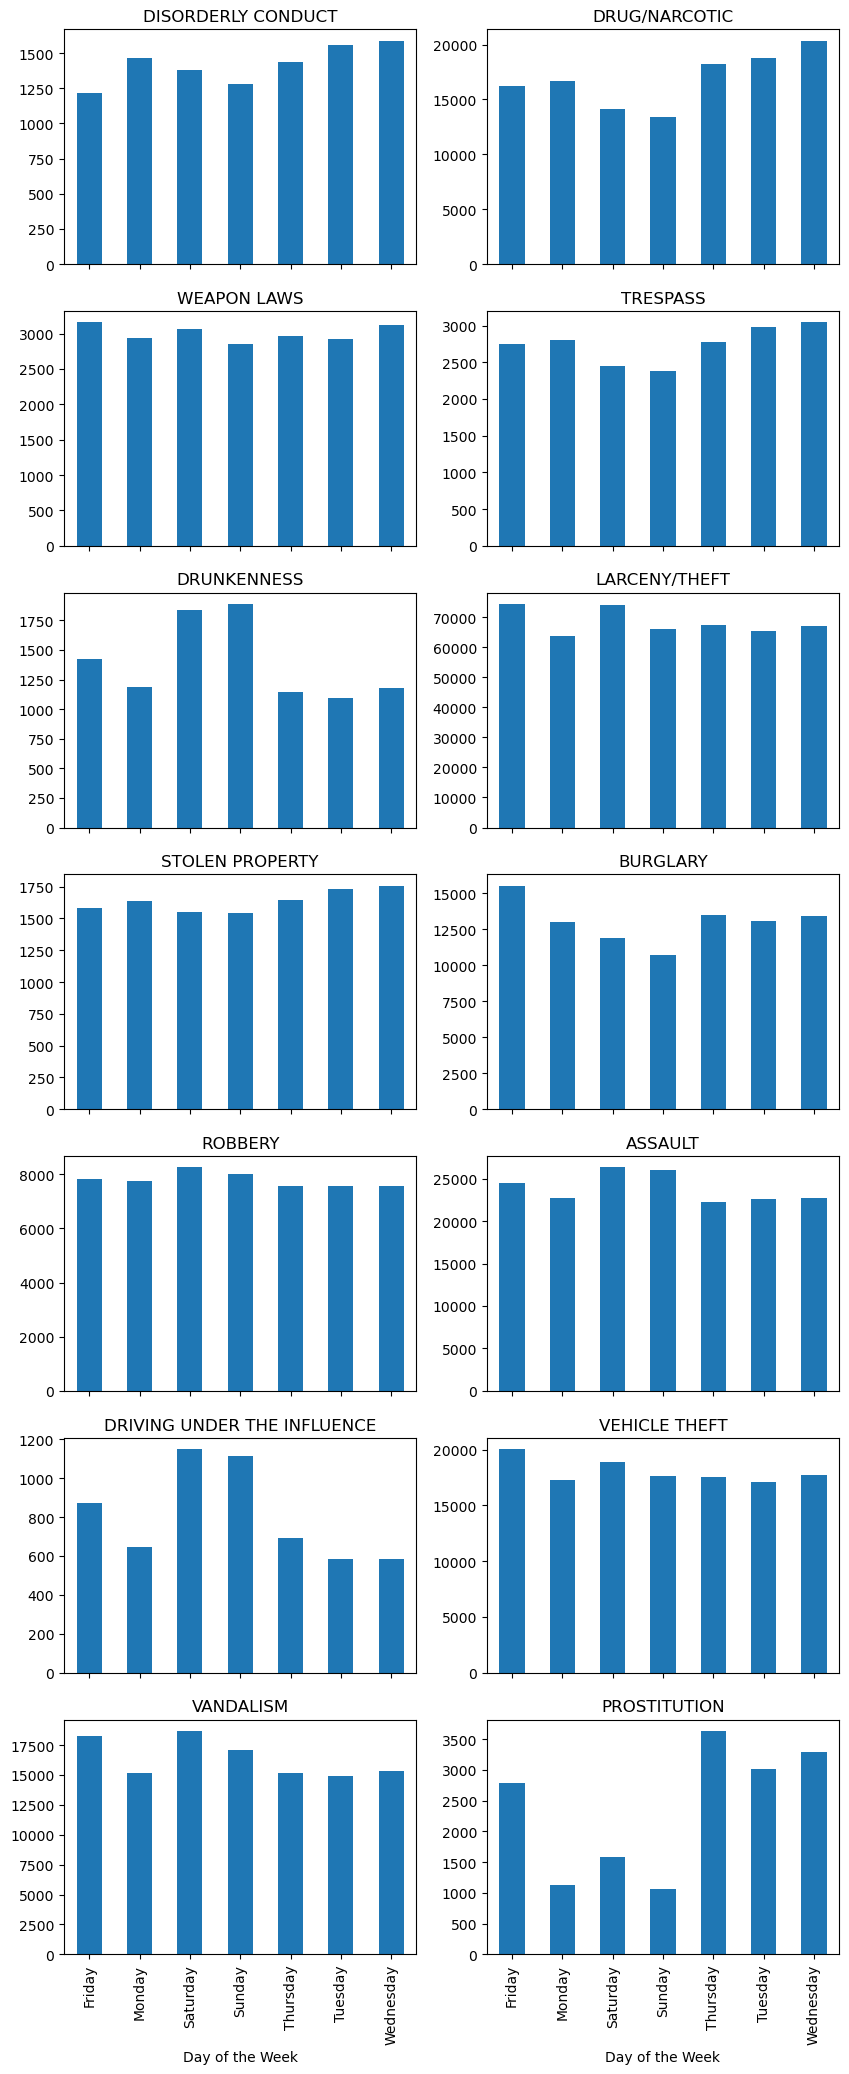

In [80]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
i = 0
for crime, df in categorizedDaily.items():
    df = df.sort_values(by=['Day of the Week'])
    df.plot.bar(ax=axes[i//2, i%2], x=df.columns[0], y=df.columns[1], title=crime, figsize=(10,25), legend=None)
    i += 1